## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, l_method, l_ratio, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l_method(l_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l_method(l_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# SyntaxError: non-default argument follows default argument
# 有默認值的參數不能放在沒有默認值的參數前面


In [6]:
## 超參數設定
REGULIZER = [l1, l2, l1_l2]
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = [1e-2, 1e-4, 1e-8]

In [33]:
results = {}
for regulizer_method in REGULIZER:
    for regulizer_ratio in L_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %s and ratio %.6f" % (regulizer_method,regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], l_method=regulizer_method, l_ratio=regulizer_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "%s-%s" % (regulizer_method, str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with Regulizer = <function l1 at 0x000000001B520400> and ratio 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________________

Epoch 48/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.7159 - acc: 0.6229 - val_loss: 3.1187 - val_acc: 0.4811
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.6778 - acc: 0.6234 - val_loss: 2.9460 - val_acc: 0.5301
Epoch 50/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.6377 - acc: 0.6260 - val_loss: 2.9250 - val_acc: 0.5241
Experiment with Regulizer = <function l1 at 0x000000001B520400> and ratio 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________

Epoch 49/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.8766 - acc: 0.6924 - val_loss: 1.5402 - val_acc: 0.4955
Epoch 50/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.8670 - acc: 0.6980 - val_loss: 1.3948 - val_acc: 0.5316s: 0.8671 - acc: 0
Experiment with Regulizer = <function l2 at 0x000000001B5207B8> and ratio 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________

Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.0210 - acc: 0.6919 - val_loss: 1.4966 - val_acc: 0.5436
Experiment with Regulizer = <function l2 at 0x000000001B5207B8> and ratio 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Experiment with Regulizer = <function l1_l2 at 0x000000001B520840> and ratio 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samp

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 158us/step - loss: 15.0991 - acc: 0.2574 - val_loss: 13.9668 - val_acc: 0.3157
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 13.0290 - acc: 0.3511 - val_loss: 12.1425 - val_acc: 0.3654
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 11.3583 - acc: 0.3763 - val_loss: 10.6058 - val_acc: 0.3812
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 9.9443 - acc: 0.3878 - val_loss: 9.3048 - val_acc: 0.3954
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 8.7427 - acc: 0.3989 - val_loss: 8.2043 - val_acc: 0.4035
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 7.7190 - acc: 0.4086 - val_loss: 7.2598 - val_acc: 0.4120
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 6.8466 - acc: 0.4143 - val_loss: 6.4

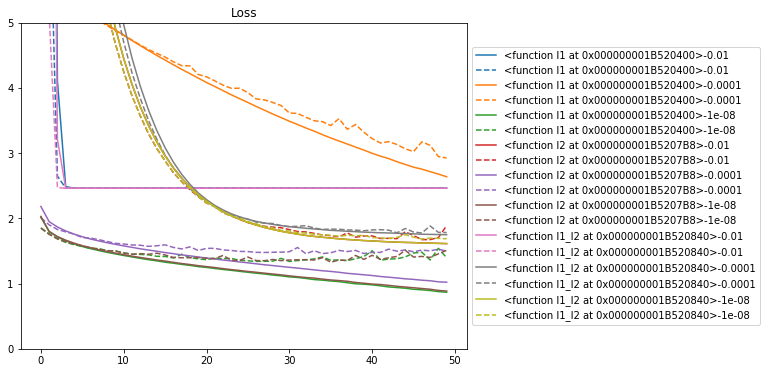

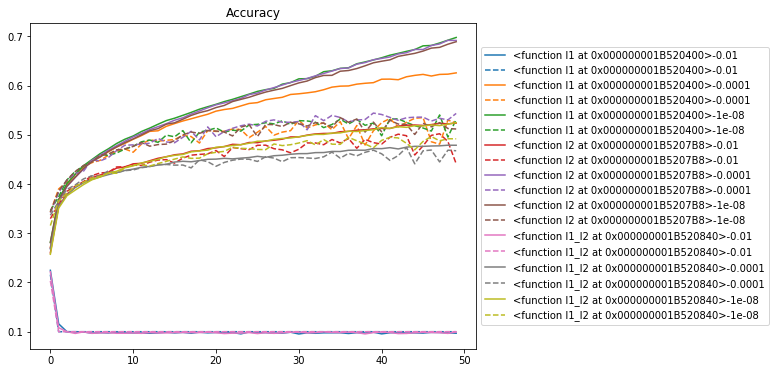

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()